# Les jeux de données sur data.gouv.fr

In [1]:
%run "librairies.ipynb"

In [2]:
#source = "https://www.data.gouv.fr/fr/datasets.csv?"
#source = "data/datasets-2019-01-02-15-31.csv"
source = "data/datasets.csv"

In [3]:
df = pd.read_csv(source, sep=";", parse_dates=["created_at", "last_modified"])
df = df.drop('resources', 1)
df.head()

/home/tk/.virtualenvs/notebook/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,_cls,_id,acronym,badges,created_at,deleted,description,ext,extras,...,license,metrics,organization,owner,private,slug,spatial,tags,temporal_coverage,title
0,0,Dataset,53dfc8b4a3a729110ca8d360,NaN,NaN,2014-07-29 10:43:50.053,NaN,Aides perçues au titre de la PAC de 2010 à 2012,{},{'datagouv_ckan_id': '63bcc97e-18db-4c64-8935-...,...,other-pd,"{'cow_score': 0, 'cow_warnings': 0, 'followers...",NaN,53d18de7a3a72946ca86f1ca,NaN,aides-percues-au-titre-de-la-politique-agricol...,"{'granularity': 'fr:commune', 'zones': []}","['2010', '2011', '2012', 'pac']","{'start': '2010-01-01', 'end': '2012-12-31'}",Aides perçues au titre de la Politique Agricol...
1,1,Dataset,537d599ca3a72973a2dc0276,NaN,NaN,2014-05-21 07:14:16.618,NaN,Le diagnostic des cales met en évidence les co...,{},{'datagouv_ckan_id': 'a2358c63-313d-4917-af2f-...,...,fr-lo,"{'cow_criticals': 0, 'cow_errors': 1, 'cow_sco...",NaN,537d58d0a3a72973a2dc0267,NaN,acces-a-la-mer-de-lorient-agglomeration,"{'granularity': 'fr:epci', 'zones': []}","['cales', 'donnees-publiques', 'littoral', 'lo...",NaN,Accès à la mer de Lorient Agglomération
2,2,Dataset,53698e89a3a729239d2034c0,NaN,NaN,2013-10-20 14:15:12.734,NaN,"Liste des événements (expositions, spectacles,...",{},{'Date de production des données': '17/09/2013...,...,fr-lo,"{'cow_criticals': 0, 'cow_errors': 0, 'cow_sco...",534fff74a3a7292c64a77ddd,NaN,False,agenda-des-evenements-du-chateau-de-versailles...,"{'zones': ['fr:commune:78646@1942-01-01'], 'gr...",['culture'],NaN,Agenda des événements du Château de Versailles
3,3,Dataset,53699760a3a729239d204c97,NaN,NaN,2014-04-18 08:00:26.168,NaN,Jeu TCL,{},{'datagouv_ckan_id': '308b56f3-89ec-4b7a-9f03-...,...,cc-by,"{'cow_criticals': 0, 'cow_errors': 0, 'cow_sco...",NaN,53542173a3a7294fcb493bc1,NaN,jeu-tcl,NaN,[],NaN,Jeu TCL
4,4,Dataset,53699042a3a729239d20396d,NaN,NaN,2014-02-26 15:29:48.643,NaN,"Les immeubles de l’État sont nombreux, variés,...",{},{'datagouv_ckan_id': '0e6cd4f9-e8b9-4c28-8261-...,...,fr-lo,"{'cow_criticals': 0, 'cow_errors': 0, 'cow_sco...",534fff8ea3a7292c64a77f02,NaN,NaN,catalogue-des-sites-publics-ouverts-aux-evenem...,NaN,"['lieux-publics', 'evenements']",NaN,Catalogue des sites publics ouverts aux evenem...


In [4]:
import datetime
from bson import ObjectId
#for row in df.iterrows():
#    print(eval(row['extras']))

df_ext = df['extras'].apply(lambda c: pd.Series(eval(c)))

df = pd.concat([df, df_ext['harvest:domain']], axis=1);

In [5]:
df.count()

Unnamed: 0           39675
_cls                 22505
_id                  39675
acronym                214
badges               31129
created_at           39675
deleted                  1
description          39377
ext                  39675
extras               39675
featured             35048
frequency            35191
frequency_date        2577
last_modified        39675
license              37820
metrics              39675
organization         37687
owner                 1550
private              30821
slug                 39674
spatial              26162
tags                 39669
temporal_coverage     3804
title                39675
harvest:domain       12238
dtype: int64

## date de création

In [6]:
created_year = df.groupby(df.created_at.dt.year).agg('count')

created_year

,Unnamed: 0,_cls,_id,acronym,badges,created_at,deleted,description,ext,extras,...,metrics,organization,owner,private,slug,spatial,tags,temporal_coverage,title,harvest:domain
created_at,,,,,,,,,,,,,,,,,,,,,
2013,4000,3992,4000,1,430,4000,1,3898,4000,4000,...,4000,3907,34,705,4000,3217,4000,1521,4000,169
2014,1719,1607,1719,1,243,1719,0,1704,1719,1719,...,1719,1497,272,762,1719,1438,1719,719,1719,196
2015,6258,6240,6258,2,2758,6258,0,6254,6258,6258,...,6258,5665,195,6209,6258,6103,6257,479,6258,196
2016,6735,6659,6735,1,6735,6735,0,6697,6735,6735,...,6735,6467,261,6568,6735,5302,6733,254,6735,873
2017,12457,4007,12457,4,12457,12457,0,12394,12457,12457,...,12457,11914,536,9525,12456,8314,12455,281,12457,4823
2018,8485,0,8485,202,8485,8485,0,8409,8485,8485,...,8485,8221,247,7031,8485,1784,8484,547,8485,5979
2019,21,0,21,3,21,21,0,21,21,21,...,21,16,5,21,21,4,21,3,21,2


### nouveaux jeux de données par année

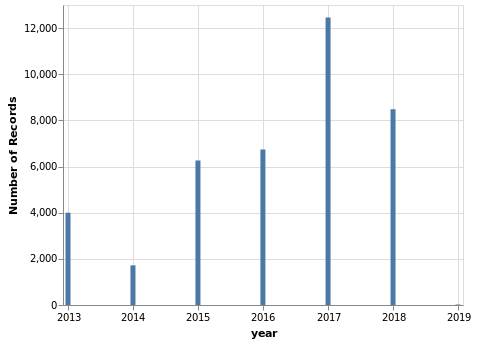

In [7]:
alt.Chart(df).mark_bar().encode(
    x="year:T",
    y="count(*):Q"
).transform_timeunit(
    year='year(created_at)'
)

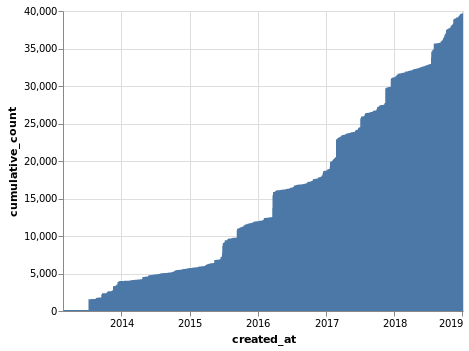

In [8]:
alt.Chart(df).mark_area().encode(
    x="created_at:T",
    y="cumulative_count:Q"
).transform_window(
    window=[{ "op": "count", "field": "count", "as": "cumulative_count"}],
    sort=[{'field': "created_at"}]
)

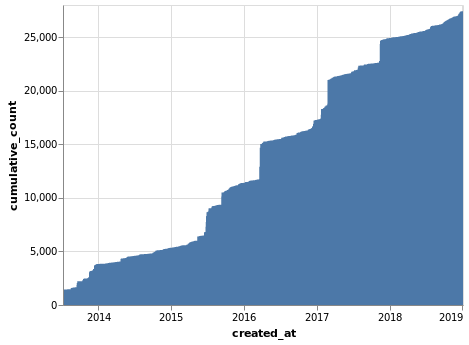

In [9]:
alt.Chart(df[df['harvest:domain'].isnull()]).mark_area().encode(
    x="created_at:T",
    y="cumulative_count:Q"
).transform_window(
    window=[{ "op": "count", "field": "count", "as": "cumulative_count"}],
    sort=[{'field': "created_at"}]
)

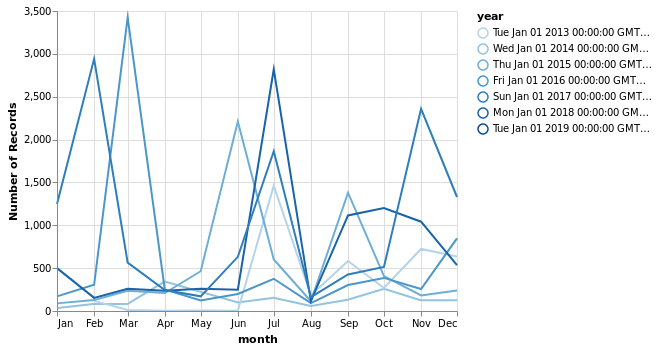

In [10]:
alt.Chart(df).mark_line().encode(
    alt.X(
        "month:T",
        axis=alt.Axis(format="%b")
    ),
    y="count():Q",
    color=alt.Color(
        "year:O"
    ),
    #row="year:O"
).transform_timeunit(
    year='year(created_at)',
    month='month(created_at)'
)

### 2018

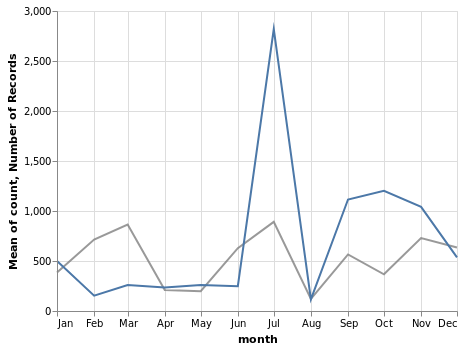

In [11]:
main = alt.Chart(df[(df.created_at > '2018-01-01') & (df.created_at < '2019-01-01')]).mark_line().encode(
    alt.X(
        "month:T",
        axis=alt.Axis(format="%b")
    ),
    y="count():Q"
).transform_timeunit(
    year='year(created_at)',
    month='month(created_at)'
)

mean = alt.Chart(df[df.created_at < '2018-01-01']).mark_line(opacity=0.8, color="grey").encode(
    alt.X(
        "month:T",
        axis=alt.Axis(format="%b")
    ),
    alt.Y(
        "mean(count):Q"
    )
).transform_timeunit(
    year='year(created_at)',
    month='month(created_at)'
).transform_aggregate(
    groupby=["year", "month"],
    count = "count()"
)

mean + main

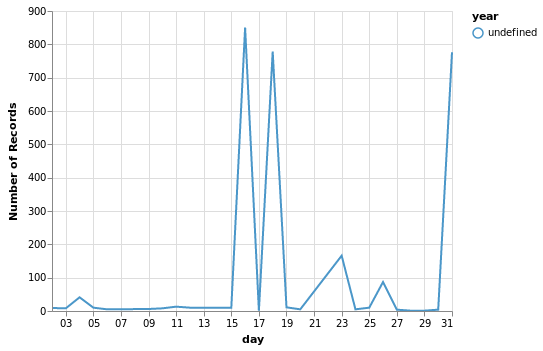

In [12]:
alt.Chart(df[(df.created_at >= '2018-07-01') & (df.created_at < '2018-08-01')]).mark_line().encode(
    alt.X(
        "day:T",
        axis=alt.Axis(format="%d")
    ),
    y="count():Q",
    color="year:O"
).transform_timeunit(
    day='date(created_at)',
)

In [13]:
df[(df.created_at >= '2018-07-16') & (df.created_at < '2018-07-17')].organization.value_counts()

534fffa7a3a7292c64a780c5    836
5a4381adc751df74bae4627d      6
5b4c534c88ee38213fb68e52      1
582a045088ee3875cec65bb4      1
5b20e610c751df0b90147be9      1
5b4c9baf88ee3807e2f80ffc      1
54da1f52c751df59f7467389      1
5b236d75c751df4eaa3a9b5e      1
534fff89a3a7292c64a77eb7      1
Name: organization, dtype: int64

In [14]:
df[(df.created_at >= '2018-07-18') & (df.created_at < '2018-07-19')].organization.value_counts()

534fff98a3a7292c64a78012    773
5a4381adc751df74bae4627d      1
589d6e22c751df0ff0ae0a65      1
559a4970c751df46a9a453ba      1
5afd7ce888ee387d9f4e136f      1
5b4f5364c751df0bb1c28756      1
Name: organization, dtype: int64

In [15]:
df[(df.created_at >= '2018-07-31') & (df.created_at < '2018-08-01')].organization.value_counts()

534fff6fa3a7292c64a77dc1    773
5a82e90b88ee387c99662abb      1
534fff8ea3a7292c64a77f02      1
58d53c4688ee380aeea5e932      1
Name: organization, dtype: int64

## mises à jour

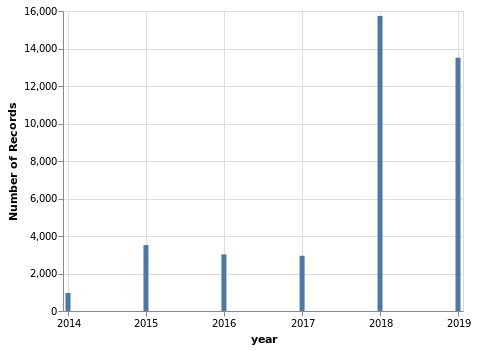

In [16]:
alt.Chart(df).mark_bar().encode(
    x="year:T",
    y="count():Q"
).transform_timeunit(
    year='year(last_modified)'
)

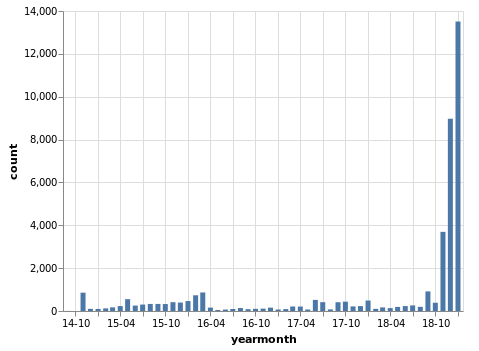

In [17]:
alt.Chart(df).mark_bar().encode(
    alt.X(
        "yearmonth:T",
        axis=alt.Axis(format="%y-%m")
    ),
    y="count:Q"
).transform_timeunit(
    yearmonth='yearmonth(last_modified)'
).transform_aggregate(
    groupby=["yearmonth"],
    count = "count()"
)

### Durée de vie des jeux de données

nombre de jours entre la dernière mise à jour et la date de création

In [18]:
df['lifespan'] = (df['last_modified'] - df['created_at']).dt.days

In [19]:
df[ df['lifespan'] < 0 ].count()

Unnamed: 0           32
_cls                 11
_id                  32
acronym               1
badges               32
created_at           32
deleted               0
description          32
ext                  32
extras               32
featured             32
frequency            32
frequency_date        8
last_modified        32
license              27
metrics              32
organization         21
owner                11
private              32
slug                 32
spatial              11
tags                 32
temporal_coverage     6
title                32
harvest:domain        0
lifespan             32
dtype: int64

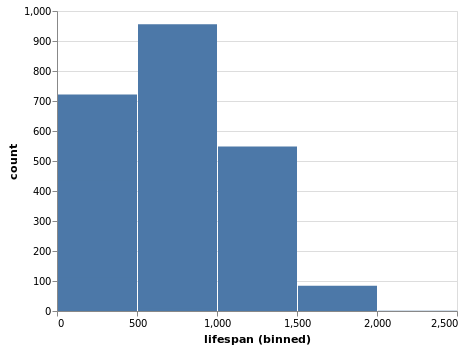

In [20]:
alt.Chart(df[ df['lifespan'] > 0 ]).mark_bar().encode(
    x=alt.X("lifespan:Q", bin=True),
    y=alt.Y("count:Q")
).transform_aggregate(
    groupby=["lifespan"],
    count = "count()"
)

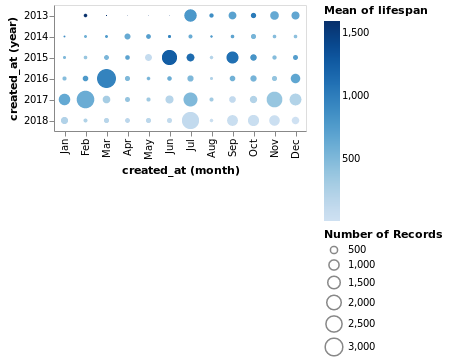

In [21]:
alt.Chart(df[ df['created_at'] < "2019-01-01"]).mark_circle().encode(
    y = "year(created_at):O",
    x = "month(created_at):O",
    size="count():Q",
    color="mean(lifespan):Q",
)

### Fraîcheur des jeux de données

Nombre de jours depuis la dernière mise à jour

In [22]:
df['freshness'] = (pd.to_datetime('2019-01-10') - df['last_modified']).dt.days

In [23]:
df[df['freshness'] < 0].count()

Unnamed: 0           0
_cls                 0
_id                  0
acronym              0
badges               0
created_at           0
deleted              0
description          0
ext                  0
extras               0
featured             0
frequency            0
frequency_date       0
last_modified        0
license              0
metrics              0
organization         0
owner                0
private              0
slug                 0
spatial              0
tags                 0
temporal_coverage    0
title                0
harvest:domain       0
lifespan             0
freshness            0
dtype: int64

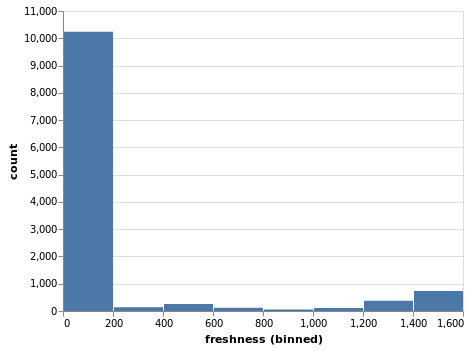

In [24]:
alt.Chart(df[ df['freshness'] > 0 ]).mark_bar().encode(
    x=alt.X("freshness:Q", bin=True),
    y=alt.Y("count:Q")
).transform_aggregate(
    groupby=["freshness"],
    count = "count()"
)

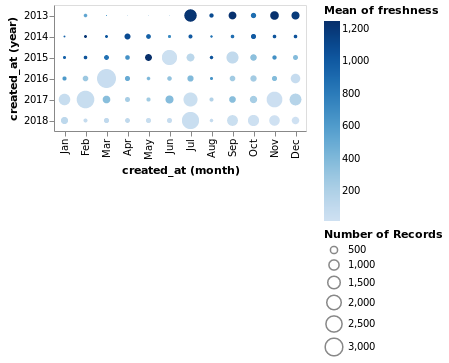

In [25]:
alt.Chart(df[ df['created_at'] < "2019-01-01"]).mark_circle().encode(
    y = "year(created_at):O",
    x = "month(created_at):O",
    size="count():Q",
    color="mean(freshness):Q",
)

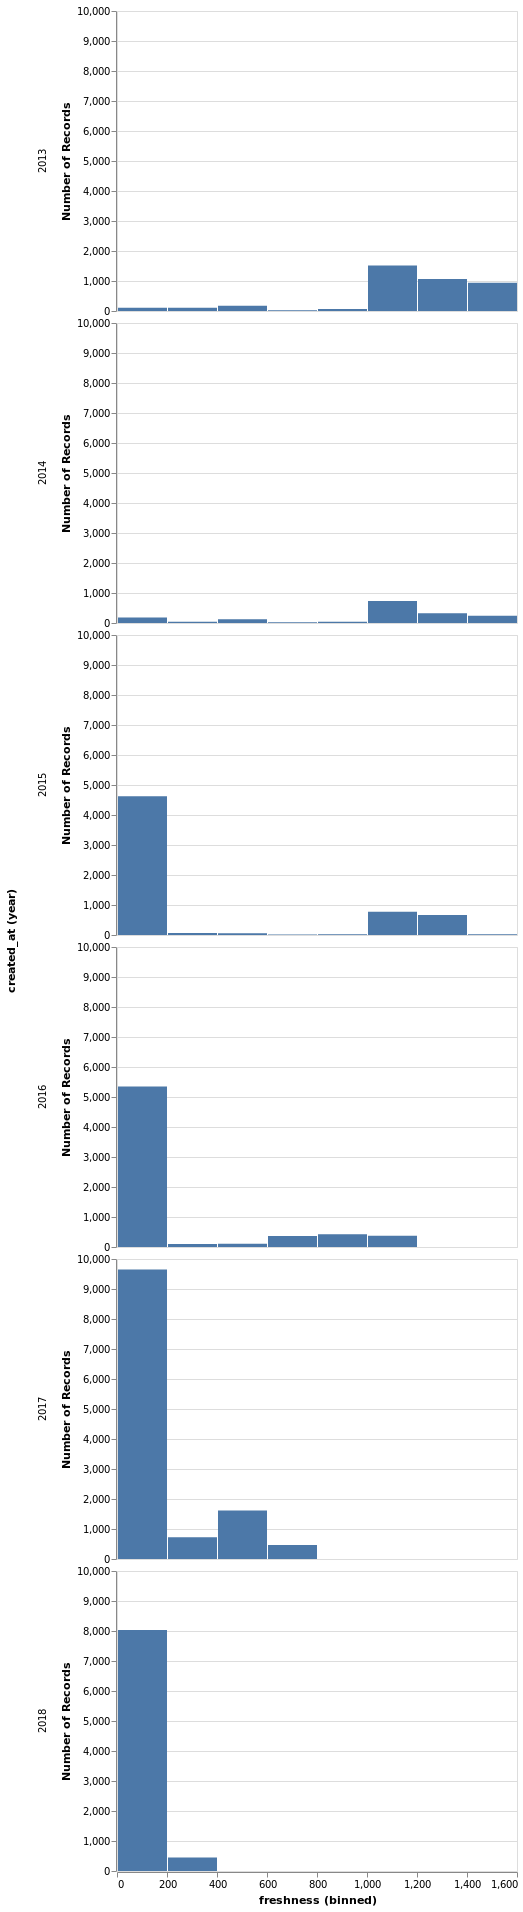

In [26]:
alt.Chart(df[ (df['freshness'] > 0) & (df['created_at'] < '2019-01-01')]).mark_bar().encode(
    x=alt.X("freshness:Q", bin=True),
    y=alt.Y("count(*):Q"),
    row="year(created_at):O"
)

### 2018

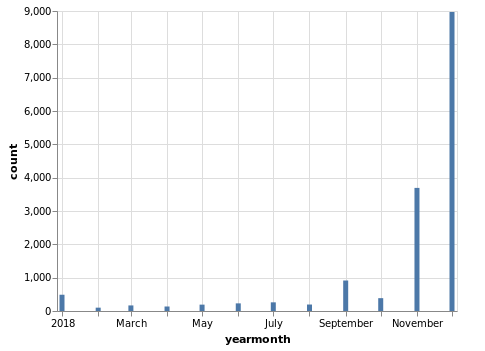

In [27]:
alt.Chart(df[(df.last_modified > '2018-01-01') & (df.last_modified < '2019-01-01')]).mark_bar().encode(
    x="yearmonth:T",
    y="count:Q"
).transform_timeunit(
    yearmonth='yearmonth(last_modified)'
).transform_aggregate(
    groupby=["yearmonth"],
    count = "count()"
)

## moissoneurs

In [28]:
df['harvest:domain'].isnull().head()

0    True
1    True
2    True
3    True
4    True
Name: harvest:domain, dtype: bool

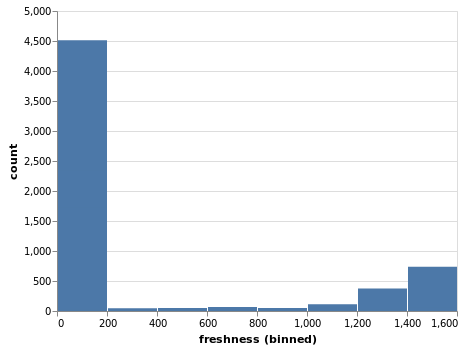

In [29]:
alt.Chart(df[ (df['freshness'] > 0) & (df['harvest:domain'].isnull())]).mark_bar().encode(
    x=alt.X("freshness:Q", bin=True),
    y=alt.Y("count:Q")
).transform_aggregate(
    groupby=["freshness"],
    count = "count()"
)

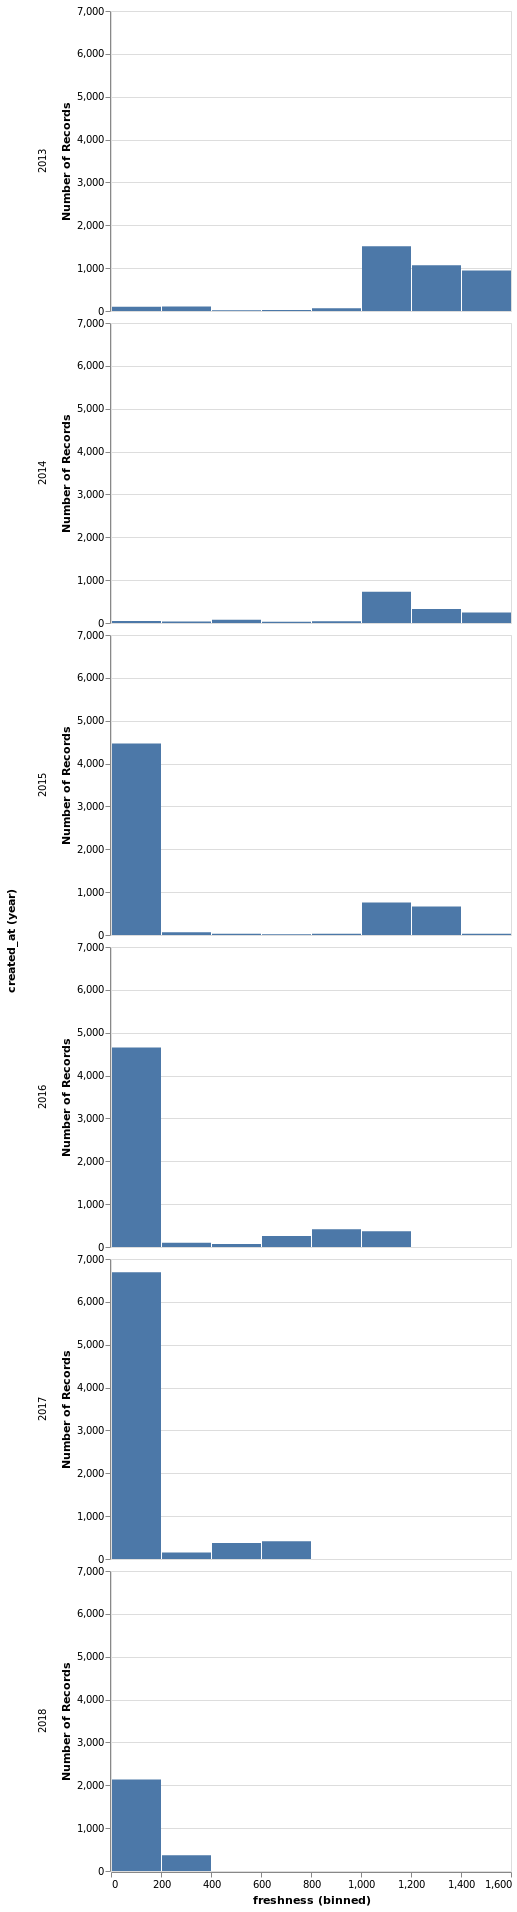

In [30]:
alt.Chart(df[ (df['freshness'] > 0) & (df['created_at'] < '2019-01-01') & (df['harvest:domain'].isnull())]).mark_bar().encode(
    x=alt.X("freshness:Q", bin=True),
    y=alt.Y("count(*):Q"),
    row="year(created_at):O"
)

## jeux de données sans producteur

In [43]:
len(df[df['organization'].isnull() & df['owner'].isnull()])

500

In [44]:
df[ (df['organization'].isnull()) & (df['owner'].isnull()) ].to_csv('data/datasets-noorg-nouser.csv')